In [115]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import SVD
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
import os
from surprise import  Reader
from surprise.model_selection import KFold
from surprise import KNNBasic


In [116]:
rDataset=pd.read_csv("restaurant_ratings.txt",delimiter="\t",names=["user","item","rating","timestamp"])

In [117]:
file_path = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [118]:
kf = KFold(n_splits = 3)


For fold 1

SVD
RMSE: 0.9448
MAE:  0.7438

PMF
RMSE: 0.9630
MAE:  0.7595

NMF
RMSE: 0.9795
MAE:  0.7705
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based
RMSE: 0.9877
MAE:  0.7807
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based
RMSE: 0.9876
MAE:  0.7817


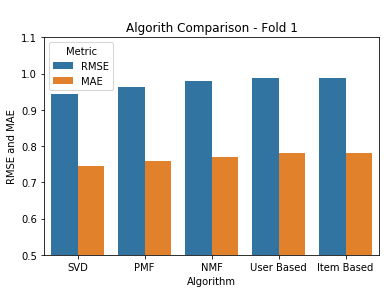


For fold 2

SVD
RMSE: 0.9454
MAE:  0.7461

PMF
RMSE: 0.9686
MAE:  0.7627

NMF
RMSE: 0.9799
MAE:  0.7696
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based
RMSE: 0.9895
MAE:  0.7812
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based
RMSE: 0.9857
MAE:  0.7814


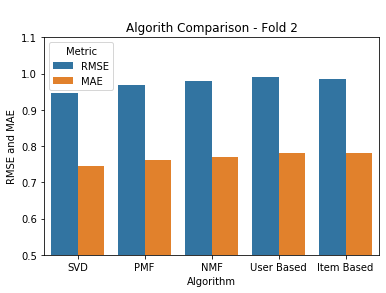


For fold 3

SVD
RMSE: 0.9481
MAE:  0.7486

PMF
RMSE: 0.9707
MAE:  0.7663

NMF
RMSE: 0.9789
MAE:  0.7682
Computing the msd similarity matrix...
Done computing similarity matrix.

User Based
RMSE: 0.9898
MAE:  0.7829
Computing the msd similarity matrix...
Done computing similarity matrix.

Item Based
RMSE: 0.9892
MAE:  0.7826


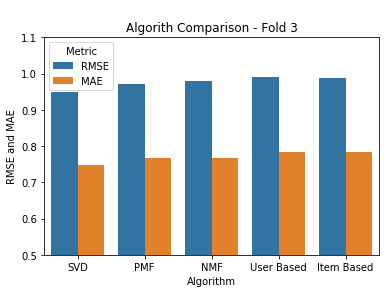

In [119]:
i = 1

for trainset, testset in kf.split(data):
    print("\nFor fold " + str(i))
    
    algo = SVD()
    algo.fit(trainset)
    predictions = algo.test(testset)
    print("\nSVD")
    svdRMSE = accuracy.rmse(predictions, verbose = True)
    svdMAE = accuracy.mae(predictions, verbose = True)
    
    algo = SVD(biased = False)
    algo.fit(trainset)
    predictions = algo.test(testset)
    print("\nPMF")
    pmfRMSE = accuracy.rmse(predictions, verbose = True)
    pmfMAE = accuracy.mae(predictions, verbose = True)
    
    algo = NMF()
    algo.fit(trainset)
    predictions = algo.test(testset)
    print("\nNMF")
    nmfRMSE = accuracy.rmse(predictions, verbose = True)
    nmfMAE = accuracy.mae(predictions, verbose = True)
    
    algo = KNNBasic(sim_options = {'user_based': True })
    algo.fit(trainset)
    predictions = algo.test(testset)
    print("\nUser Based")
    ubRMSE = accuracy.rmse(predictions, verbose = True)
    ubMAE = accuracy.mae(predictions, verbose = True)
    
    algo = KNNBasic(sim_options = {'user_based': False })
    algo.fit(trainset)
    predictions = algo.test(testset)
    print("\nItem Based")
    ibRMSE = accuracy.rmse(predictions, verbose = True)
    ibMAE = accuracy.mae(predictions, verbose = True)
    
    graphModel = {
        'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
        'RMSE and MAE': [svdRMSE, svdMAE, pmfRMSE, pmfMAE, nmfRMSE, nmfMAE, ubRMSE, ubMAE, ibRMSE, ibMAE],
        'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
    }
    df = pd.DataFrame(graphModel)
    plt.figure()
    x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric")
    x.set_ylim([.5, 1.1])
    x.set_title("\nAlgorith Comparison - Fold " + str(i) ,loc="center")
    plt.show()

    i = i + 1

In [120]:
def avgP(TrainSet, TestSet, algo):
    rmseSum=0
    maeSum=0
    for i in range(len(TrainSet)):
        algo.fit(TrainSet[i])
        predictions = algo.test(TestSet[i])
        print("\nFor fold " + str(i+1))
        rmseSum += accuracy.rmse(predictions, verbose=True)
        maeSum += accuracy.mae(predictions, verbose=True)

    print("\nAverage of RMSE = {}".format(round(rmseSum/3, 4)))
    print("Average of MAE = {}".format(round(maeSum/3, 4)))
    print("\n")
    
    return rmseSum/3,maeSum/3       

In [121]:
trainsplits=[]
testsplits=[]

for trainset, testset in kf.split(data):
    trainsplits.append(trainset)
    testsplits.append(testset)

In [122]:
print("SVD")
svdAvgRMSE, svdAvgMAE = avgP(trainsplits, testsplits, SVD())
print("\nPMF")
pmfAvgRMSE, pmfAvgMAE = avgP(trainsplits, testsplits, SVD(biased = True))
print("\nNMF")
nmfAvgRMSE, nmfAvgMAE = avgP(trainsplits, testsplits, NMF())
print("\nUser Based")
ubAvgRMSE, ubAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {'user_based': True }))
print("\nItem Based")
ibAvgRMSE, ibAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {'user_based': False }))

SVD

For fold 1
RMSE: 0.9436
MAE:  0.7462

For fold 2
RMSE: 0.9468
MAE:  0.7469

For fold 3
RMSE: 0.9478
MAE:  0.7478

Average of RMSE = 0.9461
Average of MAE = 0.747



PMF

For fold 1
RMSE: 0.9438
MAE:  0.7465

For fold 2
RMSE: 0.9469
MAE:  0.7466

For fold 3
RMSE: 0.9452
MAE:  0.7458

Average of RMSE = 0.9453
Average of MAE = 0.7463



NMF

For fold 1
RMSE: 0.9750
MAE:  0.7669

For fold 2
RMSE: 0.9756
MAE:  0.7673

For fold 3
RMSE: 0.9773
MAE:  0.7667

Average of RMSE = 0.976
Average of MAE = 0.767



User Based
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 0.9891
MAE:  0.7832
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 0.9895
MAE:  0.7819
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 0.9882
MAE:  0.7806

Average of RMSE = 0.989
Average of MAE = 0.7819



Item Based
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 

Text(0.5, 1.0, 'Algorith Comparison')

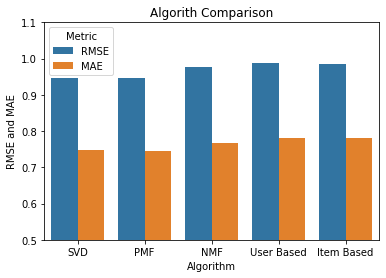

In [123]:
graph = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdAvgRMSE, svdAvgMAE, pmfAvgRMSE, pmfAvgMAE, nmfAvgRMSE, nmfAvgMAE, ubAvgRMSE, ubAvgMAE, ibAvgRMSE, ibAvgMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graph)
x = sns.barplot(x = "Algorithm", y = "RMSE and MAE", data = df, hue = "Metric")
x.set_ylim([.5, 1.1])
x.set_title("Algorith Comparison" ,loc = "center")


User Based

MSD
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 0.9891
MAE:  0.7832
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 0.9895
MAE:  0.7819
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 0.9882
MAE:  0.7806

Average of RMSE = 0.989
Average of MAE = 0.7819



Cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0212
MAE:  0.8102
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.0223
MAE:  0.8094
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.0214
MAE:  0.8080

Average of RMSE = 1.0217
Average of MAE = 0.8092



Pearson
Computing the pearson similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0170
MAE:  0.8086
Computing the pearson similarity matrix...
Done computing similarity matr

Text(0.5, 1.0, 'User Based Collaborative Filtering - Similarity Metrics')

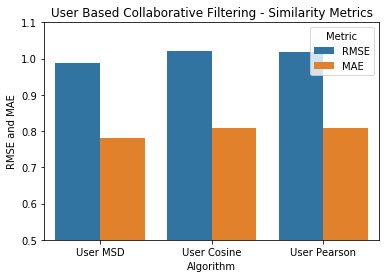

In [124]:
print("\nUser Based")
print("\nMSD")
ubMSDAvgRMSE, ubMSDAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"MSD", 'user_based': True }))
print("\nCosine")
ubCOSINEAvgRMSE, ubCOSINEAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"cosine", 'user_based': True }))
print("\nPearson")
ubPEARSONAvgRMSE, ubPEARSONAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"pearson", 'user_based': True }))

graph = {
    'Algorithm': ('User MSD','User MSD','User Cosine', 'User Cosine','User Pearson','User Pearson'), 
    'RMSE and MAE': [ubMSDAvgRMSE, ubMSDAvgMAE, ubCOSINEAvgRMSE, ubCOSINEAvgMAE, ubPEARSONAvgRMSE, ubPEARSONAvgMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graph)
x = sns.barplot(x = "Algorithm", y = "RMSE and MAE", data = df, hue = "Metric",)
x.set_ylim([.5, 1.1])
x.set_title("User Based Collaborative Filtering - Similarity Metrics" , loc = "center")


Item Based

MSD
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 0.9850
MAE:  0.7819
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 0.9857
MAE:  0.7801
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 0.9865
MAE:  0.7812

Average of RMSE = 0.9857
Average of MAE = 0.7811



Cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0341
MAE:  0.8227
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.0353
MAE:  0.8218
Computing the cosine similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.0383
MAE:  0.8241

Average of RMSE = 1.0359
Average of MAE = 0.8229



Pearson
Computing the pearson similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0438
MAE:  0.8368
Computing the pearson similarity matrix...
Done computing similarity mat

Text(0.5, 1.0, 'Item Based Collaborative Filtering - Similarity Metrics')

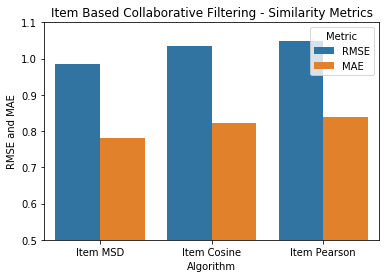

In [125]:
print("\nItem Based")
print("\nMSD")
ibMSDAvgRMSE, ibMSDAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"MSD", 'user_based': False }))
print("\nCosine")
ibCOSINEAvgRMSE, ibCOSINEAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"cosine", 'user_based': False }))
print("\nPearson")
ibPEARSONAvgRMSE, ibPEARSONAvgMAE = avgP(trainsplits, testsplits, KNNBasic(sim_options = {"name":"pearson", 'user_based': False }))

graph = {
    'Algorithm': ('Item MSD','Item MSD','Item Cosine', 'Item Cosine','Item Pearson','Item Pearson'), 
    'RMSE and MAE': [ibMSDAvgRMSE, ibMSDAvgMAE, ibCOSINEAvgRMSE, ibCOSINEAvgMAE, ibPEARSONAvgRMSE, ibPEARSONAvgMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graph)
x = sns.barplot(x = "Algorithm", y = "RMSE and MAE", data = df, hue = "Metric",)
x.set_ylim([.5, 1.1])
x.set_title("Item Based Collaborative Filtering - Similarity Metrics" , loc = "center")

In [126]:
knnUBRMSE=[]
knnUBMAE=[]

for i in range(1, 21):
    rmse, mae = avgP(trainsplits, testsplits, KNNBasic(k = i, sim_options = {'user_based': True }))
    knnUBRMSE.append(rmse)
    knnUBMAE.append(mae)

Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.3233
MAE:  0.9801
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.3289
MAE:  0.9798
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.3296
MAE:  0.9820

Average of RMSE = 1.3273
Average of MAE = 0.9807


Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.1488
MAE:  0.8880
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.1523
MAE:  0.8897
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.1567
MAE:  0.8945

Average of RMSE = 1.1526
Average of MAE = 0.8907


Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0920
MAE:  0.8559
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.0898
MAE:  0.8516
Computin

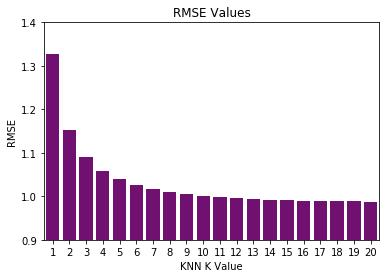

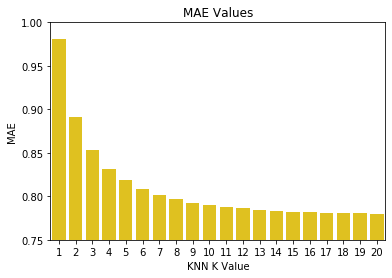

Best Value for K = 20


In [127]:
knnRMSE = {
    'KNN K Value': [y for y in range(1, 21)], 
    'RMSE': knnUBRMSE
}
df = pd.DataFrame(knnRMSE)
plt.figure()
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="Purple")
graph.set_ylim([.9, 1.4])
graph.set_title("RMSE Values")
plt.show()

knnMAE = {
    'KNN K Value': [y for y in range(1, 21)], 
    'MAE': knnUBMAE
}
df=pd.DataFrame(knnMAE)
plt.figure()
graph = sns.barplot(x="KNN K Value",y="MAE",data=df,color="Gold")
graph.set_ylim([.75, 1.0])
graph.set_title("MAE Values")
plt.show()

bestKvalue = knnUBRMSE.index(min(knnUBRMSE))+1
print("Best Value for K = {}".format(bestKvalue))

In [128]:
knnIBRMSE=[]
knnIBMAE=[]

for i in range(1, 21):
    rmse, mae = avgP(trainsplits, testsplits,KNNBasic(k=i, sim_options = {'user_based': True }))
    knnIBRMSE.append(rmse)
    knnIBMAE.append(mae)

Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.3233
MAE:  0.9801
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.3289
MAE:  0.9798
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.3296
MAE:  0.9820

Average of RMSE = 1.3273
Average of MAE = 0.9807


Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.1488
MAE:  0.8880
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.1523
MAE:  0.8897
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 3
RMSE: 1.1567
MAE:  0.8945

Average of RMSE = 1.1526
Average of MAE = 0.8907


Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 1
RMSE: 1.0920
MAE:  0.8559
Computing the msd similarity matrix...
Done computing similarity matrix.

For fold 2
RMSE: 1.0898
MAE:  0.8516
Computin

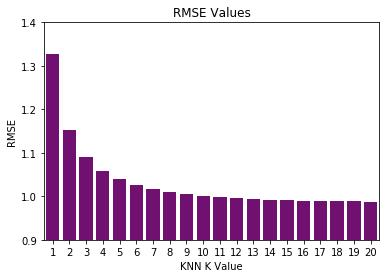

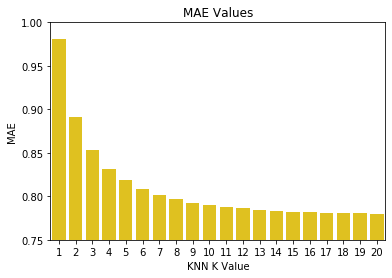

Best Value for K = 20


In [129]:
knnRMSE = {
    'KNN K Value': [y for y in range(1, 21)], 
    'RMSE': knnIBRMSE
}
df = pd.DataFrame(knnRMSE)
plt.figure()
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="Purple")
graph.set_ylim([.9, 1.4])
graph.set_title("RMSE Values")
plt.show()

knnMAE = {
    'KNN K Value': [y for y in range(1, 21)], 
    'MAE': knnIBMAE
}
df=pd.DataFrame(knnMAE)
plt.figure()
graph = sns.barplot(x="KNN K Value",y="MAE",data=df,color="Gold")
graph.set_ylim([.75, 1.0])
graph.set_title("MAE Values")
plt.show()

bestKvalue = knnIBRMSE.index(min(knnIBRMSE))+1
print("Best Value for K = {}".format(bestKvalue))